                                   10        100        1000        10000
native_search                   0.801802  2.034903  16.955614  242.019892
linear_search                   1.185894  3.680944  34.110546  562.217951
binary_search_iterative         1.404285  1.761913   3.399849    8.973122
binary_search_recursive         1.375675  2.345085   4.762888   10.469913
binary_search_iterative_better  1.434803  1.707077   3.704071    8.555889
interpolation_search            4.647970  2.943277   6.284237   16.783953
jump_search                     8.361578  9.171247  28.123617  141.611338
exponential_search              2.068281  2.823591   5.446911   11.402130
fibonacci_search                8.518696  4.250765   7.592201   12.367487


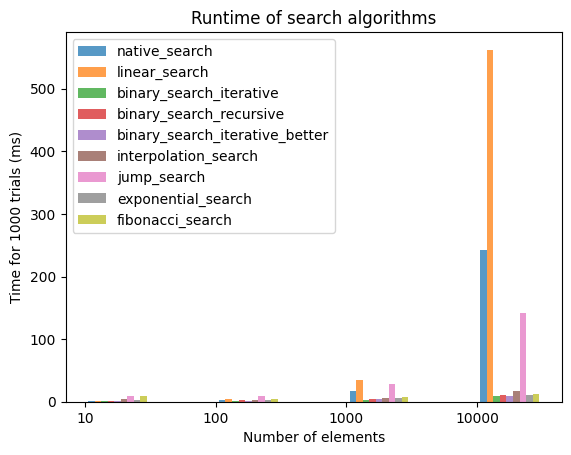

In [1]:
# Array Search Algorithms Performance Comparison

import matplotlib.pyplot as plt
import pandas as pd
import random
import time
import math

# Generate a sorted list of integers with random step increases
def random_list(size):
    arr = [0] * size
    for i in range(1, size):
        arr[i] = arr[i-1] + random.randint(1, 11)
    return arr

# Native Python search using built-in index() method
def native_search(arr, key):
    return arr.index(key)

# Linear search (brute-force)
def linear_search(arr, key):
    for i in range(len(arr)):
        if arr[i] == key:
            return i
    return -1

# Binary search (iterative version)
def binary_search_iterative(arr, key):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Binary search with slightly optimized midpoint calculation
def binary_search_iterative_better(arr, key):
    low = 0
    high = len(arr) - 1
    while low < high:
        mid = (low + high + 1) // 2
        if arr[mid] <= key:
            low = mid
        else:
            high = mid - 1
    return low if arr[low] == key else -1

# Binary search (recursive version)
def binary_search_recursive_helper(arr, key, low, high):
    if high >= low:
        mid = low + (high - low) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] > key:
            return binary_search_recursive_helper(arr, key, low, mid - 1)
        else:
            return binary_search_recursive_helper(arr, key, mid + 1, high)
    else:
        return -1

def binary_search_recursive(arr, key):
    return binary_search_recursive_helper(arr, key, 0, len(arr) - 1)

# Interpolation search (recursive version)
def interpolation_search_helper(arr, key, lo, hi):
    if arr[lo] == arr[hi]:
        return lo if key == arr[lo] else -1
    if lo <= hi and arr[lo] <= key <= arr[hi]:
        pos = int(lo + ((hi - lo) / float(arr[hi] - arr[lo])) * float((key - arr[lo])))
        if arr[pos] == key:
            return pos
        elif arr[pos] < key:
            return interpolation_search_helper(arr, key, pos + 1, hi)
        else:
            return interpolation_search_helper(arr, key, lo, pos - 1)
    return -1

def interpolation_search(arr, key):
    return interpolation_search_helper(arr, key, 0, len(arr) - 1)

# Jump search (search block by block, then linearly)
def jump_search(arr, key):
    n = len(arr)
    step = math.sqrt(n)
    prev = 0
    while arr[int(min(step, n) - 1)] < key:
        prev = step
        step += math.sqrt(n)
        if prev >= n:
            return -1
    while arr[int(prev)] < key:
        prev += 1
        if int(prev) == min(step, n):
            return -1
    return int(prev) if arr[int(prev)] == key else -1

# Exponential search (find range, then binary search)
def exponential_search(arr, key):
    n = len(arr)
    if arr[0] == key:
        return 0
    i = 1
    while i < n and arr[i] <= key:
        i = i * 2
    return binary_search_recursive_helper(arr, key, i // 2, min(i, n - 1))

# Fibonacci search (uses Fibonacci sequence to divide the range)
def fibonacci_search(arr, key):
    n = len(arr)
    fibMMm2 = 0
    fibMMm1 = 1
    fibM = fibMMm2 + fibMMm1
    while fibM < n:
        fibMMm2 = fibMMm1
        fibMMm1 = fibM
        fibM = fibMMm2 + fibMMm1
    offset = -1
    while fibM > 1:
        i = min(offset + fibMMm2, n - 1)
        if arr[i] < key:
            fibM = fibMMm1
            fibMMm1 = fibMMm2
            fibMMm2 = fibM - fibMMm1
            offset = i
        elif arr[i] > key:
            fibM = fibMMm2
            fibMMm1 -= fibMMm2
            fibMMm2 = fibM - fibMMm1
        else:
            return i
    if fibMMm1 and arr[n - 1] == key:
        return n - 1
    return -1

# Plotting function to visualize performance
def plot_times(dict_searches, sizes, trials, searches, file_name):
    search_num = 0
    plt.xticks([j for j in range(len(sizes))], [str(size) for size in sizes])
    for search in searches:
        search_num += 1
        d = dict_searches[search.__name__]
        x_axis = [j + 0.05 * search_num for j in range(len(sizes))]
        y_axis = [d[i] for i in sizes]
        plt.bar(x_axis, y_axis, width=0.05, alpha=0.75, label=search.__name__)
    plt.legend()
    plt.title("Runtime of search algorithms")
    plt.xlabel("Number of elements")
    plt.ylabel("Time for " + str(trials) + " trials (ms)")
    plt.savefig(file_name)
    plt.show()

# Print results in table format
def print_times(dict_searches, filename):
    pd.set_option("display.max_rows", 500)
    pd.set_option("display.max_columns", 500)
    pd.set_option("display.width", 1000)
    df = pd.DataFrame.from_dict(dict_searches).T
    print(df)
    with open(filename, "w") as f:
        f.write(df.to_string())

# Run each search algorithm on various array sizes and record timing
def run_searches(searches, sizes, trials):
    dict_searches = {search.__name__: {} for search in searches}
    for size in sizes:
        for search in searches:
            dict_searches[search.__name__][size] = 0
        for trial in range(1, trials + 1):
            arr = random_list(size)
            idx = random.randint(0, size - 1)
            key = arr[idx]
            for search in searches:
                start_time = time.time()
                idx_found = search(arr, key)
                end_time = time.time()
                if idx_found != idx:
                    print(search.__name__, "wrong index found", arr, idx, idx_found)
                net_time = end_time - start_time
                dict_searches[search.__name__][size] += 1000 * net_time
    return dict_searches

# Main function to execute the benchmarking
def main():
    assn = "Assignment01"
    sizes = [10, 100, 1000, 10000]
    searches = [
        native_search, linear_search, binary_search_iterative,
        binary_search_recursive, binary_search_iterative_better,
        interpolation_search, jump_search, exponential_search, fibonacci_search
    ]
    trials = 1000
    dict_searches = run_searches(searches, sizes, trials)
    print_times(dict_searches, assn + ".txt")
    plot_times(dict_searches, sizes, trials, searches, assn + ".png")

if __name__ == "__main__":
    main()
